# Time Series Data
* 시간이 지나면서 값이 변하는 Data
* ex. 주식
* Many to one

{Open, High, Low, Volume, Close} x 7 (7일)
* input dimention = 5
* sequence lengh = 7
* output dimention = 1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [3]:
seq_length = 7
input_dim = 5
output_dim = 1
hidden_dim = 10
learning_rate = 0.01
iterations = 500

xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1] # 시간순
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

 [0.0876499  0.08587918 0.08999083 0.17505602 0.08535784]] -> [0.08990437]
[[0.13214844 0.12724093 0.14113701 0.11460966 0.13198906]
 [0.12885548 0.12984236 0.13987525 0.11901049 0.1243822 ]
 [0.1241638  0.12076644 0.12848985 0.1883302  0.11406511]
 [0.08846594 0.09431912 0.09676924 0.17297661 0.08442519]
 [0.09140922 0.0874978  0.09665193 0.19801918 0.08148157]
 [0.0876499  0.08587918 0.08999083 0.17505602 0.08535784]
 [0.0770135  0.08287322 0.09835392 0.11006543 0.08990437]] -> [0.08833045]
[[0.12885548 0.12984236 0.13987525 0.11901049 0.1243822 ]
 [0.1241638  0.12076644 0.12848985 0.1883302  0.11406511]
 [0.08846594 0.09431912 0.09676924 0.17297661 0.08442519]
 [0.09140922 0.0874978  0.09665193 0.19801918 0.08148157]
 [0.0876499  0.08587918 0.08999083 0.17505602 0.08535784]
 [0.0770135  0.08287322 0.09835392 0.11006543 0.08990437]
 [0.07240915 0.08460739 0.09225036 0.11406292 0.08833045]] -> [0.09462577]
[[0.1241638  0.12076644 0.12848985 0.1883302  0.11406511]
 [0.08846594 0.094319

 [0.57130509 0.5828272  0.59109455 0.22226405 0.58422444]] -> [0.59937962]
[[0.67504739 0.69410795 0.66330954 0.5327597  0.65930074]
 [0.64532342 0.65887386 0.66911973 0.17489468 0.67206604]
 [0.67248296 0.66418064 0.63225214 0.24528995 0.6283201 ]
 [0.6196501  0.6156622  0.6009687  0.27701891 0.6216169 ]
 [0.62247688 0.63066344 0.59270842 0.25628753 0.57842471]
 [0.57130509 0.5828272  0.59109455 0.22226405 0.58422444]
 [0.59149986 0.59155629 0.59696331 0.14675988 0.59937962]] -> [0.58232997]
[[0.64532342 0.65887386 0.66911973 0.17489468 0.67206604]
 [0.67248296 0.66418064 0.63225214 0.24528995 0.6283201 ]
 [0.6196501  0.6156622  0.6009687  0.27701891 0.6216169 ]
 [0.62247688 0.63066344 0.59270842 0.25628753 0.57842471]
 [0.57130509 0.5828272  0.59109455 0.22226405 0.58422444]
 [0.59149986 0.59155629 0.59696331 0.14675988 0.59937962]
 [0.58928511 0.58346318 0.59989769 0.13766245 0.58232997]] -> [0.59206432]
[[0.67248296 0.66418064 0.63225214 0.24528995 0.6283201 ]
 [0.6196501  0.615662

In [4]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

X = tf.placeholder(tf.float32, [None, seq_length, input_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [5]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 58.635093688964844
[step: 1] loss: 29.61651611328125
[step: 2] loss: 11.318629264831543
[step: 3] loss: 3.943486213684082
[step: 4] loss: 6.360718727111816
[step: 5] loss: 12.280713081359863
[step: 6] loss: 14.222432136535645
[step: 7] loss: 11.602471351623535
[step: 8] loss: 7.2241435050964355
[step: 9] loss: 3.5996053218841553
[step: 10] loss: 1.972285509109497
[step: 11] loss: 2.3351571559906006
[step: 12] loss: 3.7443580627441406
[step: 13] loss: 4.980212211608887
[step: 14] loss: 5.324060440063477
[step: 15] loss: 4.7318596839904785
[step: 16] loss: 3.569291114807129
[step: 17] loss: 2.3203275203704834
[step: 18] loss: 1.3906984329223633
[step: 19] loss: 0.997570812702179
[step: 20] loss: 1.1307713985443115
[step: 21] loss: 1.584702730178833
[step: 22] loss: 2.060189723968506
[step: 23] loss: 2.3047165870666504
[step: 24] loss: 2.2203946113586426
[step: 25] loss: 1.880154013633728
[step: 26] loss: 1.4573974609375
[step: 27] loss: 1.1255968809127808
[step: 28] loss:

[step: 239] loss: 0.676018476486206
[step: 240] loss: 0.674890398979187
[step: 241] loss: 0.6737657785415649
[step: 242] loss: 0.6726449728012085
[step: 243] loss: 0.6715278029441833
[step: 244] loss: 0.6704146862030029
[step: 245] loss: 0.6693053841590881
[step: 246] loss: 0.6682001948356628
[step: 247] loss: 0.6670991778373718
[step: 248] loss: 0.6660023927688599
[step: 249] loss: 0.6649098992347717
[step: 250] loss: 0.663821816444397
[step: 251] loss: 0.6627379655838013
[step: 252] loss: 0.6616588830947876
[step: 253] loss: 0.6605842709541321
[step: 254] loss: 0.6595147848129272
[step: 255] loss: 0.658449649810791
[step: 256] loss: 0.6573895215988159
[step: 257] loss: 0.6563344597816467
[step: 258] loss: 0.6552842855453491
[step: 259] loss: 0.6542391777038574
[step: 260] loss: 0.6531994342803955
[step: 261] loss: 0.6521648168563843
[step: 262] loss: 0.6511354446411133
[step: 263] loss: 0.6501114964485168
[step: 264] loss: 0.649092972278595
[step: 265] loss: 0.6480798721313477
[step:

[step: 479] loss: 0.5201737880706787
[step: 480] loss: 0.5197553038597107
[step: 481] loss: 0.5193374752998352
[step: 482] loss: 0.5189200639724731
[step: 483] loss: 0.5185031890869141
[step: 484] loss: 0.5180869698524475
[step: 485] loss: 0.5176712274551392
[step: 486] loss: 0.5172560811042786
[step: 487] loss: 0.5168414115905762
[step: 488] loss: 0.5164272785186768
[step: 489] loss: 0.5160136818885803
[step: 490] loss: 0.5156005024909973
[step: 491] loss: 0.5151879191398621
[step: 492] loss: 0.514775812625885
[step: 493] loss: 0.5143641829490662
[step: 494] loss: 0.5139530897140503
[step: 495] loss: 0.5135424733161926
[step: 496] loss: 0.5131323337554932
[step: 497] loss: 0.512722909450531
[step: 498] loss: 0.5123134851455688
[step: 499] loss: 0.5119049549102783
RMSE: 0.0307760126888752


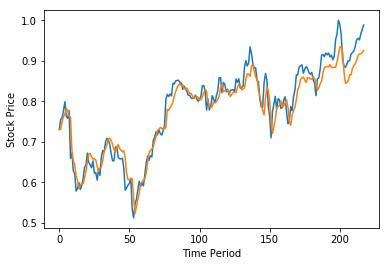

In [6]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()